# Práctica 4: Máquinas de Vectores Soporte

* Introducción a los Modelos Computacionales, Ingeniería Informática (4º Curso).
* Escuela Politécnica Superior de Córdoba (Universidad de Córdoba).
--------------
* <b>Autor</b>: Alejandro Fuerte Jurado
* <b>DNI</b>: 46271137J
* <b>Correo</b>: i62fujua@uco.es

En esta práctica se realizarán distintos ejercicios para entender mejor el funcionamiento de las máquinas de vectores soporte (SVM) en problemas de clasificación. A lo largo de este cuaderno se responderá a distintas preguntas, en las que se realizarán una serie de experimentos utilizando bases de datos sintéticas y reales.

# Bases de datos sintéticas

## Representación 2D de las SVMs
Para realizar la representación gráfica en dos dimensiones desde Python, vamos a utilizar el siguiente script. Se llamará al script varias veces para comparar valores de parámetros, por lo que vamos a definirlo como función que reciba los distintos parámetros que vamos a utilizar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

def mainScript(dataset, c):
    # Load the dataset
    string = "Datasets\csv\\" + dataset + ".csv"
    data = pd.read_csv(string ,header=None)
    X = data.iloc[:,:-1].values
    y = data.iloc[:,-1].values

    # Train the SVM model
    svm_model = svm.SVC(kernel='linear',C=c)
    svm_model.fit(X, y)

    # Plot the points
    plt.figure(1)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Plot the support vectors class regions, the separating hyperplane and the margins
    plt.axis('tight')
    # |->Plot support vectors
    plt.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1], 
                marker='+', s=100, zorder=10, cmap=plt.cm.Paired)
    # |-> Extract the limits
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    # |-> Create a grid with all the points and then obtain the SVM 
    #    score for all the points
    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
    # |-> Plot the results in a countour
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], 
                linestyles=['--', '-', '--'], levels=[-1, 0, 1])

    plt.xlabel('x1')
    plt.ylabel('x2')



    plt.show()


def mainScriptWithoutPlot(dataset):
    # Load the dataset
    string = "Datasets\csv\\" + dataset + ".csv"
    data = pd.read_csv(string,header=None)
    X = data.iloc[:,:-1].values
    y = data.iloc[:,-1].values

    # Plot the points
    plt.figure(1)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.show()

<ipython-input-1-f37a2c01d469>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


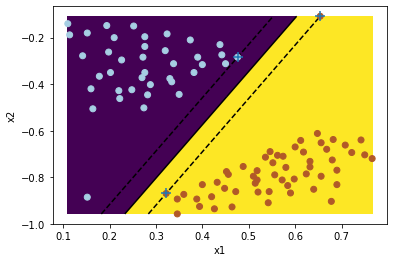

In [2]:
mainScript("dataset1",1000)

Como podemos ver, en este primer caso se utiliza el primer dataset de ejemplo. Al comienzo del script se lee la base de datos, dividiéndola en inputs (X) y outputs (y).

A continuación se realiza el entrenamiento utilizando el algoritmo SVC de scikit-learn, utilizando un kernel lineal y el parámetro C con un valor de 1000.

El resto del código se encarga de crear la visualización que se muestra al final, mostrando las dos clases del problema y los distintos patrones. Se puede ver que la clase representada con el color morado utiliza un vector soporte, mientras que la clase representada con el color amarillo utiliza dos.

## Primer dataset de ejemplo
Vamos a volver a ejecutar el script pero obviando las líneas correspondientes a la representación gráfica de la SVM, de forma que sólo se van a mostrar los puntos del dataset.

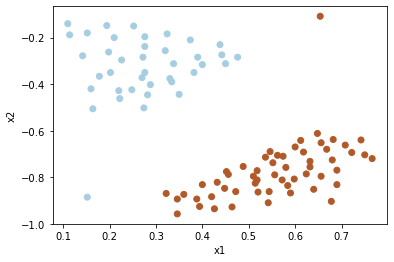

In [3]:
mainScriptWithoutPlot("dataset1")

Sólo viendo los puntos se puede saber de forma intuitiva que el hiperplano separador más útil para separar las dos clases es el lineal, ya que una recta es suficiente para separar ambas clases sin cometer ningún error.

Si volvemos al script original y utilizamos distintos valores de C, podemos analizar la utilidad de este parámetro. Cuando C tiene un valor bajo, el margen del SVM aumenta, por lo que puede dar lugar a errores. 

<ipython-input-1-f37a2c01d469>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


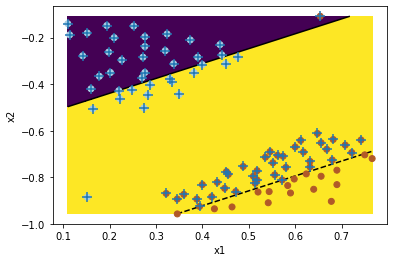

<ipython-input-1-f37a2c01d469>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


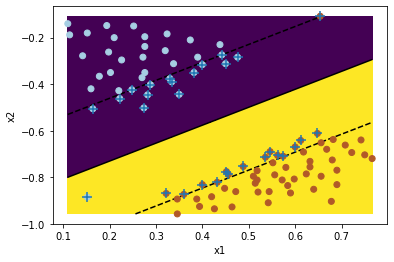

<ipython-input-1-f37a2c01d469>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


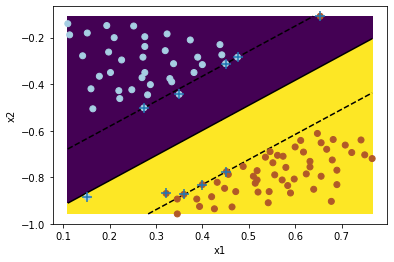

<ipython-input-1-f37a2c01d469>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


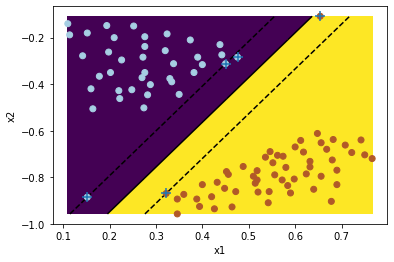

<ipython-input-1-f37a2c01d469>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


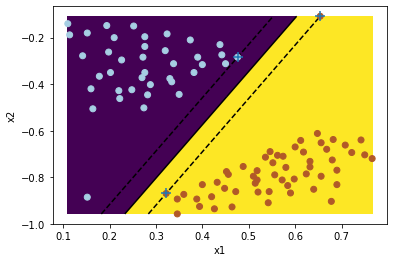

<ipython-input-1-f37a2c01d469>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


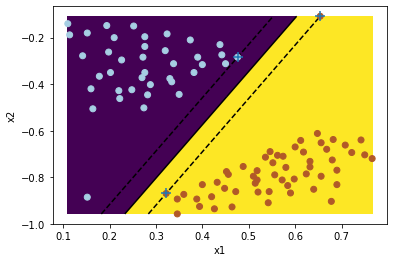

In [4]:
mainScript("dataset1",0.1)
mainScript("dataset1",1)
mainScript("dataset1",10)
mainScript("dataset1",100)
mainScript("dataset1",1000)
mainScript("dataset1",10000)

Por otro lado, un valor alto produce un margen más pequeño, y por tanto el SVM es más restrictivo. Es importante dar con el valor correcto del margen para que se clasifiquen todos los patrones correctamente y no se produzca sobre-entrenamiento.

En el caso de esta base de datos, no es hasta que el valor de C es igual a 100 que todos los patrones se clasifican correctamente. Un valor de C=1000 produce un margen más restrictivo, y valores más altos no producen más cambios relevantes. Es por ello que el valor de 1000 parece ser el que produce resultados más satisfactorios.

## Segundo dataset de ejemplo
Vamos a lanzar ahora el script utilizando el segundo dataset de ejemplo:

<ipython-input-1-f37a2c01d469>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


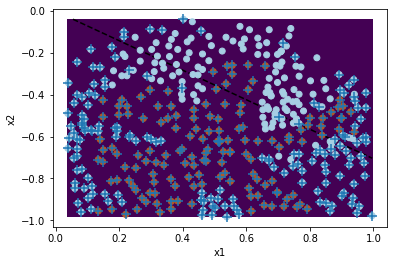

In [5]:
mainScript("dataset2",1000)


Está claro que el modelo no es capaz de clasificar correctamente. Si modificamos los valores de C vemos que el resultado es igual de desastroso. Esto se debe a que el problema se encuentra en el tipo de kernel que utilizamos. Este dataset no se puede separar de forma lineal, por lo que un hiperplano separador lineal no es capaz de resolver este problema.

Para resolver esto vamos a utilizar un kernel de tipo RBF, y vamos a comprobar distintos valores de C y gamma:

In [6]:
def mainScriptRBF(dataset, c, gamma):
    # Load the dataset
    string = "Datasets\csv\\" + dataset + ".csv"
    data = pd.read_csv(string,header=None)
    X = data.iloc[:,:-1].values
    y = data.iloc[:,-1].values

    # Train the SVM model
    svm_model = svm.SVC(kernel='rbf',C=c, gamma=gamma)
    svm_model.fit(X, y)

    # Plot the points
    plt.figure(1)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Plot the support vectors class regions, the separating hyperplane and the margins
    plt.axis('tight')
    # |->Plot support vectors
    plt.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1], 
                marker='+', s=100, zorder=10, cmap=plt.cm.Paired)
    # |-> Extract the limits
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    # |-> Create a grid with all the points and then obtain the SVM 
    #    score for all the points
    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
    # |-> Plot the results in a countour
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], 
                linestyles=['--', '-', '--'], levels=[-1, 0, 1])

    plt.xlabel('x1')
    plt.ylabel('x2')



    plt.show()

<ipython-input-6-06373eb26d38>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


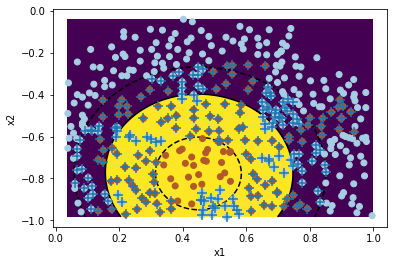

<ipython-input-6-06373eb26d38>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


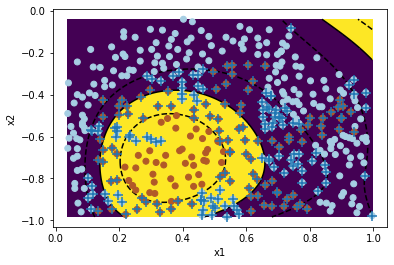

<ipython-input-6-06373eb26d38>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


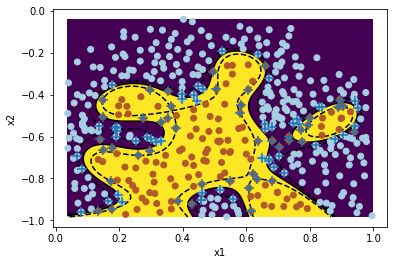

<ipython-input-6-06373eb26d38>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


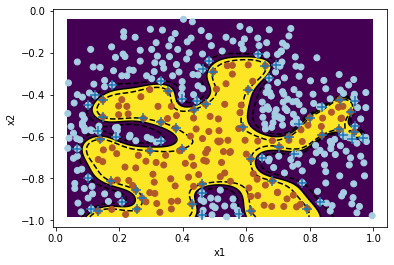

<ipython-input-6-06373eb26d38>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


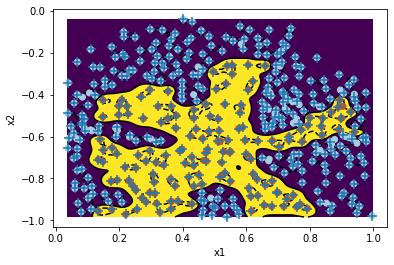

<ipython-input-6-06373eb26d38>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


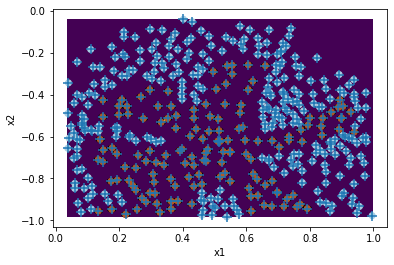

In [7]:
mainScriptRBF("dataset2",1000,0.1)
mainScriptRBF("dataset2",1000,1)
mainScriptRBF("dataset2",1000,10)
mainScriptRBF("dataset2",1000,100)
mainScriptRBF("dataset2",1000,1000)
mainScriptRBF("dataset2",1000,10000)

Como podemos ver, un valor bajo de gamma, como los dos primeros, produce un infra-entrenamiento, mientras que un valor alto, como son los dos últimos, produce sobre-entrenamiento. Todo esto en relación al valor de C que teníamos anteriormente.

Probando distintas combinaciones de C y gamma, se ha llegado a un resultado deseable utilizando los valores C=10000 y gamma=10:

<ipython-input-6-06373eb26d38>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


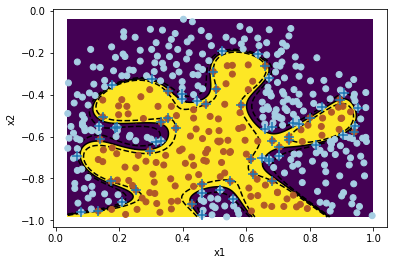

In [8]:
mainScriptRBF("dataset2",10000,10)

## Tercer dataset de ejemplo
Vamos a comprobar si este dataset es linealmente separable.

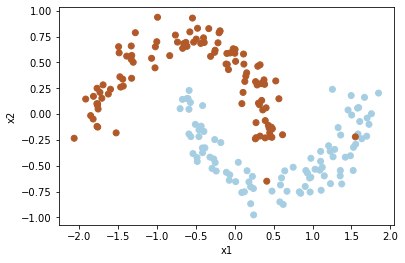

In [9]:
mainScriptWithoutPlot("dataset3")

Este dataset tampoco puede separarse correctamente utilizando un kernel lineal. Observando los puntos se pueden encontrar un par de outliers, ya que se posicionan en la zona de una clase pero se clasifican como la otra.

Vamos entonces a resolverlo utilizando una RBF de la misma forma que antes, analizando distintos valores de C y gamma:

<ipython-input-6-06373eb26d38>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


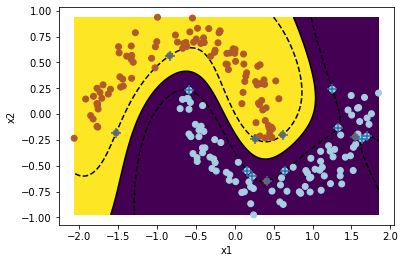

In [10]:
mainScriptRBF("dataset3",100,1)

Estos valores ofrecen unos resultados bastante óptimos, por lo que no es necesario hacer al modelo más restrictivo. A continuación vamos a realizar un ejemplo de infra-entrenamiento y otro de sobre-entrenamiento, respectivamente.

<ipython-input-6-06373eb26d38>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


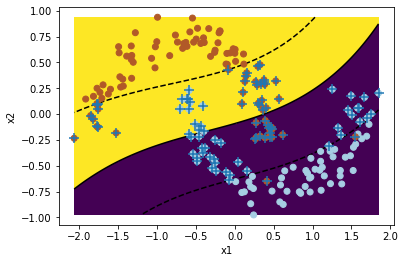

<ipython-input-6-06373eb26d38>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


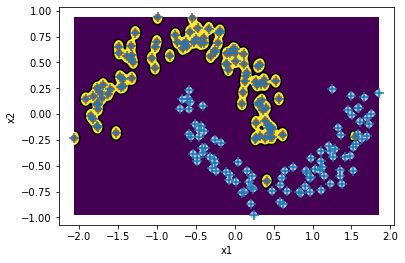

In [11]:
mainScriptRBF("dataset3",1,0.1)
mainScriptRBF("dataset3",100,1000)

## Interfaz de consola
Vamos a reproducir a continuación el proceso que se realiza a través de la interfaz de consola de libsvm. Esto es, estandarizar el fichero de la base de datos, entrenar el modelo y realizar una predicción en base a una parte de test obtenida de los propios datos. Todo ello usando el tercer dataset.

Primero vamos realizar la estandarización haciendo uso del objeto StandardScaler.

In [12]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

# Load the dataset
data = pd.read_csv("Datasets\csv\dataset3.csv",header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

X_train = scaler.fit_transform(X,y)

A continuación vamos a dividir el dataset en entrenamiento y test de forma estratificada, con un 75% de patrones de train y un 25% de patrones de test

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, y, stratify=y, test_size=0.25)

Por último sólo queda entrenar el modelo como antes y realizar la predicción del test. Para el modelo vamos a utilizar los valores de los parámetros escogidos con anterioridad.

0.9803921568627451


<ipython-input-14-21572dd2c5ca>:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


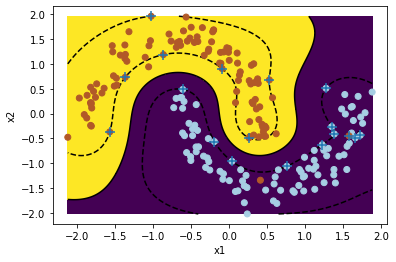

In [14]:
# Train the SVM model
svm_model = svm.SVC(kernel='rbf',C=100, gamma=1)
svm_model.fit(x_train, y_train)

print(svm_model.score(x_test,y_test))

# Plot the points
plt.figure(1)
plt.clf()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Plot the support vectors class regions, the separating hyperplane and the margins
plt.axis('tight')
# |->Plot support vectors
plt.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1], 
            marker='+', s=100, zorder=10, cmap=plt.cm.Paired)
# |-> Extract the limits
x_min = X_train[:, 0].min()
x_max = X_train[:, 0].max()
y_min = X_train[:, 1].min()
y_max = X_train[:, 1].max()
# |-> Create a grid with all the points and then obtain the SVM 
#    score for all the points
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
# |-> Plot the results in a countour
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], 
            linestyles=['--', '-', '--'], levels=[-1, 0, 1])

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

Como podemos ver, el procentaje de buena clasificación es del 98%, por lo que el modelo predice correctamente.

Vamos a realizar el entrenamiento de antes utilizando el objeto GridSearchCV, con el que podemos hacer un proceso de validación cruzada anidada tipo K-fold y encontrar los mejores valores de C y gamma.

In [15]:
from sklearn.model_selection import GridSearchCV

Cs = np.logspace(-3, 3, num=7, base=10)
Gs = np.logspace(-3, 3, num=7, base=10)

optimo = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs,gamma=Gs), n_jobs=-1, cv=5)
optimo.fit(x_train, y_train)

print(optimo.score(x_test, y_test))

0.9803921568627451


Parece ser que los resultados son igual de buenos que antes, por lo que se puede entender que los valores escogidos al principio de C y gamma eran los óptimos para este problema.

En cualquier caso, está claro que es más cómodo utilizar validación cruzada para encontrar los mejores valores de distintos parámetros.

Vamos a realizar de forma manual la validación cruzada para entender cómo funciona.

Primero realizamos una partición tipo K-fold de los datos de entrenamiento. Vamos a hacer k=5.

In [16]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

Ahora para cada combinación de los parámetros en cada conjunto realizamos el entrenamiento y guardamos los datos para después escoger el mejor.

In [17]:
results=np.zeros((len(Cs)*len(Gs),7))
i = 2
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    j=0
    
    for c in Cs:
        for g in Gs:
            train = svm.SVC(kernel='rbf', C=c, gamma=g).fit(X_train, y_train)
            
            if i == 2:
                results[j,0]=c
                results[j,1]=g
            
            results[j,i]=train.score(X_test, y_test)
            j = j+1
    i= i+1
maxJ=0
maxMean=np.mean(results[0,2:7])

A continuación escogemos la mejor combinación de parámetros de los que hemos almacenado en la matriz.

In [18]:
for x in range(1, (len(Cs)*len(Gs))):
    mean = np.mean(results[x,2:7])
    if mean > maxMean:
        maxMean = mean
        maxJ = x

Por último, utilizamos los parámetros escogidos para realizar el entrenamiento y el test.

In [19]:
optimo = svm.SVC(kernel='rbf', C=results[maxJ,0], gamma=results[maxJ,1])

x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

optimo.fit(x_train, y_train)
print(optimo.score(x_test, y_test))

1.0


Como vemos, el resultado es el mismo, por lo que hemos simulado correctamente el funcionamiento de GridSearchCV.

# Bases de datos reales
## Base de datos noMNIST
Vamos a utilizar el script de validación cruzada en esta base de datos. Para ello vamos a definir una función a la que le podamos pasar el valor de K y el rango de valores de búsqueda para los parámetros C y gamma.

In [20]:
def mainScriptRBF_KFold(train_dataset, test_dataset, k, start, end):
    scaler = preprocessing.StandardScaler()

    # Load the dataset
    string = "Datasets\csv\\" + train_dataset + ".csv"
    data_train = pd.read_csv(string,header=None)
    string = "Datasets\csv\\" + test_dataset + ".csv"
    data_test = pd.read_csv(string,header=None)
    x_train = data_train.iloc[:,:-1].values
    y_train = data_train.iloc[:,-1].values
    x_test = data_test.iloc[:,:-1].values
    y_test = data_test.iloc[:,-1].values
    
    Cs = np.logspace(start, end, num=7, base=10)
    Gs = np.logspace(start, end, num=7, base=10)
    
    svm_model = svm.SVC(kernel='rbf',C=100, gamma=1)
    svm_model.fit(x_train, y_train)

    optimo = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs,gamma=Gs), n_jobs=-1, cv=k)
    optimo.fit(x_train, y_train)

    print(optimo.score(x_test, y_test))

In [21]:
mainScriptRBF_KFold("train_nomnist","test_nomnist",5,-3,3)

0.9133333333333333


Como vemos el resultado es del 91% en CCR, por lo que el modelo es bueno. Sin embargo, es cierto que el tiempo computacional es alto. Esto se debe a que estamos utilizando un valor de k=5. Vamos a probar un valor de k=3 para ver si no varían demasiado los resultados.

In [22]:
mainScriptRBF_KFold("train_nomnist","test_nomnist",3,-3,3)

0.8833333333333333


Como vemos, los resultados son significativamente peores. Por tanto, quizás conviene más utilizar un k-fold de 5 y esperar unos segundos más.

## Base de datos clasificación de spam
Vamos a probar de la misma forma el script con esta base de datos, pero esta vez con un kernel lineal. Por tanto, vamos a definir la función correspondiente cambiando el valor del kernel. Además, vamos a añadirle la creación de una matriz de confusión para analizar cuáles son los correos en los que la SVM se equivoca.

In [25]:
from sklearn.metrics import confusion_matrix

def mainScript_KFold(train_dataset, test_dataset, k, start, end):
    scaler = preprocessing.StandardScaler()

    # Load the dataset
    string = "Datasets\csv\\" + train_dataset + ".csv"
    data_train = pd.read_csv(string,header=None)
    string = "Datasets\csv\\" + test_dataset + ".csv"
    data_test = pd.read_csv(string,header=None)
    x_train = data_train.iloc[:,:-1].values
    y_train = data_train.iloc[:,-1].values
    x_test = data_test.iloc[:,:-1].values
    y_test = data_test.iloc[:,-1].values
    
    Cs = np.logspace(start, end, num=7, base=10)
    Gs = np.logspace(start, end, num=7, base=10)
    
    svm_model = svm.SVC(kernel='linear',C=100, gamma=1)
    svm_model.fit(x_train, y_train)

    optimo = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs,gamma=Gs), n_jobs=-1, cv=k)
    optimo.fit(x_train, y_train)
    
    print(optimo.score(x_test, y_test))
    
    predict = optimo.predict(x_test)
    cm = confusion_matrix(y_test, predict)
    print(cm)
    
    for i in range(predict.shape[0]):
        if predict[i] != y_test[i]:
            print(f"Error: number {i}, {y_test[i]}  - Predicted:  {predict[i]}")

In [26]:
mainScript_KFold("train_spam","test_spam",5,-3,3)

0.989
[[684   8]
 [  3 305]]
Error: number 9, 1  - Predicted:  0
Error: number 21, 0  - Predicted:  1
Error: number 58, 0  - Predicted:  1
Error: number 73, 0  - Predicted:  1
Error: number 147, 0  - Predicted:  1
Error: number 328, 0  - Predicted:  1
Error: number 407, 1  - Predicted:  0
Error: number 526, 0  - Predicted:  1
Error: number 560, 0  - Predicted:  1
Error: number 842, 0  - Predicted:  1
Error: number 881, 1  - Predicted:  0


Parece ser que la implementación usada da unos resultados extraordinarios, al tener un CCR del 98'9%. Como consume demasiado tiempo computacional, vamos a mantener esa configuración.

Como podemos ver en la matriz de confusión, 3 correos spam se clasifican como no spam, mientras que 8 correos no spam se clasifican como spam.

Si vemos en qué correos comete errores, podemos buscar las palabras clave que contiene un correo en específico. Por ejemplo, vamos a analizar el primer error, el correo 10. Este correo es spam, pero el modelo no lo ha considerado como tal. Las palabras de este correo son las siguientes:

* emailaddr
* for
* group
* http
* inform
* irish
* linux
* list
* maintain
* subscript
* un
* user

En principio parecen palabras que suelen usarse en correos spam, como enlaces de páginas web. Quizás le falta alguna palabra más determinante para que el modelo lo considere spam.

Veamos ahora el siguiente caso, el correo 22, el cual no es spam pero el modelo sí lo ha considerado como tal.

* an 
* and
* at
* be
* by
* call
* can
* contact
* email
* emailaddr
* geek
* heaven
* httpaddr
* if
* immedi
* is
* list
* mail
* messag
* need
* net
* not
* number
* of
* offic
* our
* out
* repres
* respond
* return
* sf
* spamassassin
* sponsor
* start
* talk
* the
* there
* thi
* thinkgeek
* to
* until
* welcom
* when
* will
* you
* your

Como se puede ver, estamos ante un correo mucho más elaborado que el anterior. Sin embargo, puede que palabras como sponsor sean la razón de que el modelo haya clasificado este correo como spam.

Si utilizamos el kernel rbf para este problema, los resultados también serán igual de buenos, pero el tiempo computacional será horriblemente más alto.

Si utilizamos el modelo rbf creado en la práctica anterior, los resultados de la mejor semilla son los siguientes:

Number of RBFs used: 399

[[9   3)]
[  9 298)]]

Training MSE: 0.012602

Test MSE: 0.012183

Training CCR: 98.40%

Test CCR: 98.80%

Todo ello con un número de RBFs de 399, y un valor de eta de 0.1.

Los resultados son también muy buenos. Realmente la única razón por la que no igualan los resultados anteriores es porque no se ha utilizado un proceso de K-folds donde se encuentran los mejores parámetros. Es por ello que el tiempo computacional es menor, siendo un punto negativo que tengamos que ejecutar el script continuamente hasta dar con los mejores valores para los parámetros.